### The propose are: prepare EDA and recomendation system

## Importing the necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

Link for dataset https://www.kaggle.com/datasets/shivamb/netflix-shows/data

 Load Netflix Dataset

In [2]:
df=pd.read_csv('./netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


About this Dataset: Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.



In [3]:
print(f'This dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

This dataset contains 8807 rows and 12 columns


Checking what are the columns here:

In [64]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Basic information about the dataset

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Checking null values of each columns

In [66]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Check missing country, where the name is missing replace it with an "unknown".

In [7]:
df.loc[df['country'].isnull(), 'country'] = 'Unknown'

Split DataFrames into movies and TV shows for separate analytics

In [8]:
df_shows=df[df['type']=='TV Show'].copy()
df_movies=df[df['type']=='Movie'].copy()

## Data Visialization

Breakdown of movies and TV shows

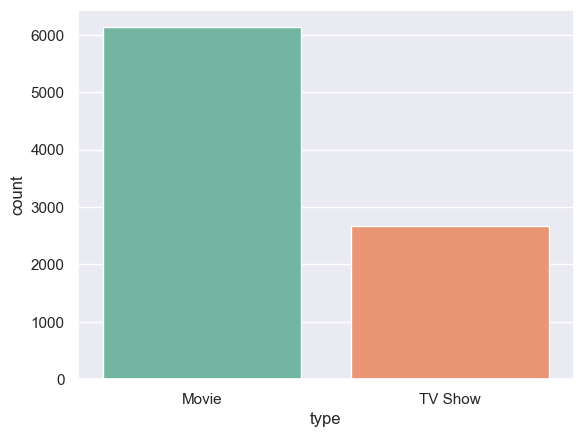

In [9]:
sns.set(style='darkgrid')
ax = sns.countplot(x='type', hue='type', data=df, palette='Set2', dodge=False)


In [10]:
content_type = df.groupby(['type']).size().reset_index(name='counts')
content_type
fig = px.pie(content_type, names = 'type',values = 'counts',color_discrete_sequence =  px.colors.sequential.Agsunset,
             title = 'Distribution of Content type on Netflix',height =  500 , width = 700)
fig.show()

We can see that there are almost twice as many movies as shows.

What is the most popular duration?

In [67]:
topdirs = pd.Series(df['duration']).value_counts()
topdirs

duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
94 min        146
             ... 
16 min          1
186 min         1
193 min         1
189 min         1
191 min         1
Name: count, Length: 220, dtype: int64

Let's make an interactive visualization to see it more clearly

In [12]:
from plotly import graph_objects as go
fig = go.Figure([
    go.Bar(x=topdirs.index, y=topdirs.values, marker_color='indianred')
])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

## Moving on to analyzing the movies.

What month is the most attractive for releasing content?

In [13]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country            0
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Check the missing dates, there are only 10 of them, so we'll delete them.

In [14]:
netflix_data = df_shows[['date_added']].dropna()
netflix_data.isna().sum()

date_added    0
dtype: int64

From the date_added, I take the month and year

In [15]:
netflix_data['year']=netflix_data['date_added'].apply(lambda x: x.split(', ')[-1])
netflix_data['month']=netflix_data['date_added'].apply(lambda x: x.lstrip().split()[0])
netflix_data

,date_added,year,month
1,"September 24, 2021",2021,September
2,"September 24, 2021",2021,September
3,"September 24, 2021",2021,September
4,"September 24, 2021",2021,September
5,"September 24, 2021",2021,September
...,...,...,...
8795,"May 1, 2018",2018,May
8796,"January 17, 2017",2017,January
8797,"September 13, 2018",2018,September
8800,"December 15, 2016",2016,December


When were earlier and later movies added?

In [16]:
netflix_data.sort_values(by=['year','month'])

,date_added,year,month
6611,"February 4, 2008",2008,February
5940,"August 2, 2013",2013,August
7112,"March 31, 2013",2013,March
6885,"October 8, 2013",2013,October
7908,"October 14, 2013",2013,October
...,...,...,...
153,"September 1, 2021",2021,September
154,"September 1, 2021",2021,September
160,"September 1, 2021",2021,September
165,"September 1, 2021",2021,September


Transforming the date for visualization

In [17]:
month_order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"][::-1]
df_date=netflix_data.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
df_date


year,2008,2013,2014,2015,2016,2017,2018,2019,2020,2021
month,,,,,,,,,,
December,0.0,0.0,1.0,7.0,44.0,38.0,61.0,47.0,68.0,0.0
November,0.0,0.0,2.0,2.0,18.0,30.0,36.0,68.0,51.0,0.0
October,0.0,2.0,0.0,4.0,19.0,29.0,45.0,65.0,51.0,0.0
September,0.0,1.0,0.0,1.0,19.0,32.0,43.0,37.0,53.0,65.0
August,0.0,1.0,0.0,0.0,11.0,38.0,34.0,44.0,47.0,61.0
July,0.0,0.0,0.0,2.0,9.0,34.0,27.0,59.0,43.0,88.0
June,0.0,0.0,0.0,2.0,7.0,29.0,28.0,46.0,41.0,83.0
May,0.0,0.0,0.0,1.0,4.0,23.0,27.0,48.0,52.0,38.0
April,0.0,0.0,1.0,4.0,8.0,27.0,28.0,43.0,50.0,53.0


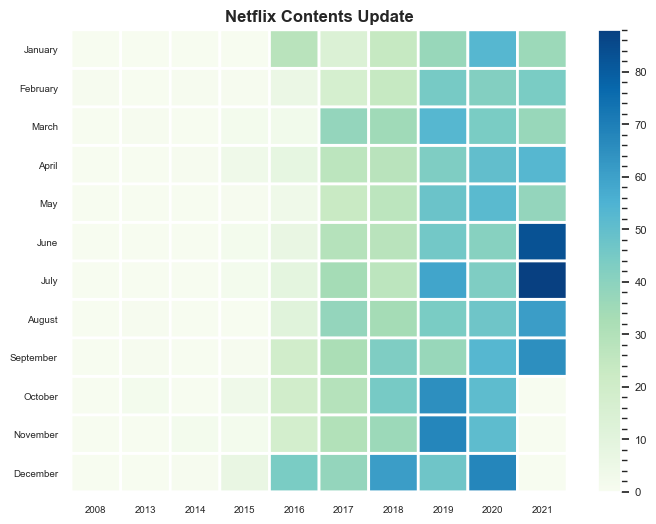

In [18]:
plt.figure(figsize=(8,6), dpi=100)
plt.pcolor(df_date, cmap='GnBu', edgecolors='white', linewidths=2)
plt.xticks(np.arange(0.5, len(df_date.columns),1),df_date.columns, fontsize=7)
plt.yticks(np.arange(0.5, len(df_date.index),1),df_date.index, fontsize=7)

plt.title('Netflix Contents Update', fontsize=12, fontweight='bold')
cbar = plt.colorbar()

cbar.ax.tick_params(labelsize=8)
cbar.ax.minorticks_on()
plt.show()

In 2019 Junary and December was released little content, although these months are very nice.

## Analysis of ration movies

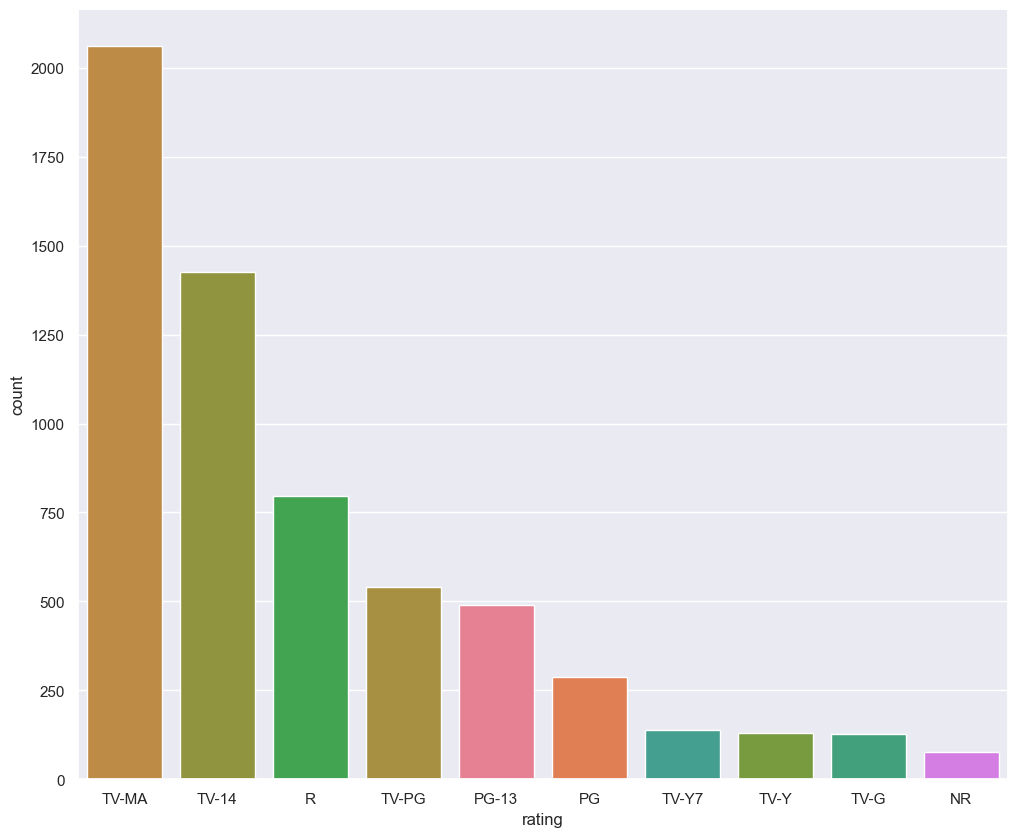

In [19]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
ax = sns.countplot(x='rating', hue='rating', data=df_movies, dodge=False, order=df_movies['rating'].value_counts().index[0:10])
ax.legend_.remove()

As we can see the most popular:
TV-MA (Programs with this rating are generally not suitable for people or individuals under the age of 17.), 
TV-14( Content may be unsuitable for children under 14 years of age and may contain intense violence, intense sexual references (including censored and/or partial nudity, medium to high-level implied scenes of sexual intercourse, and sexual innuendo), intensely suggestive dialogue, and strong language.), 
R (Under 17 requires accompanying parent or adult guardian.).

Analysis of the movie's release by year

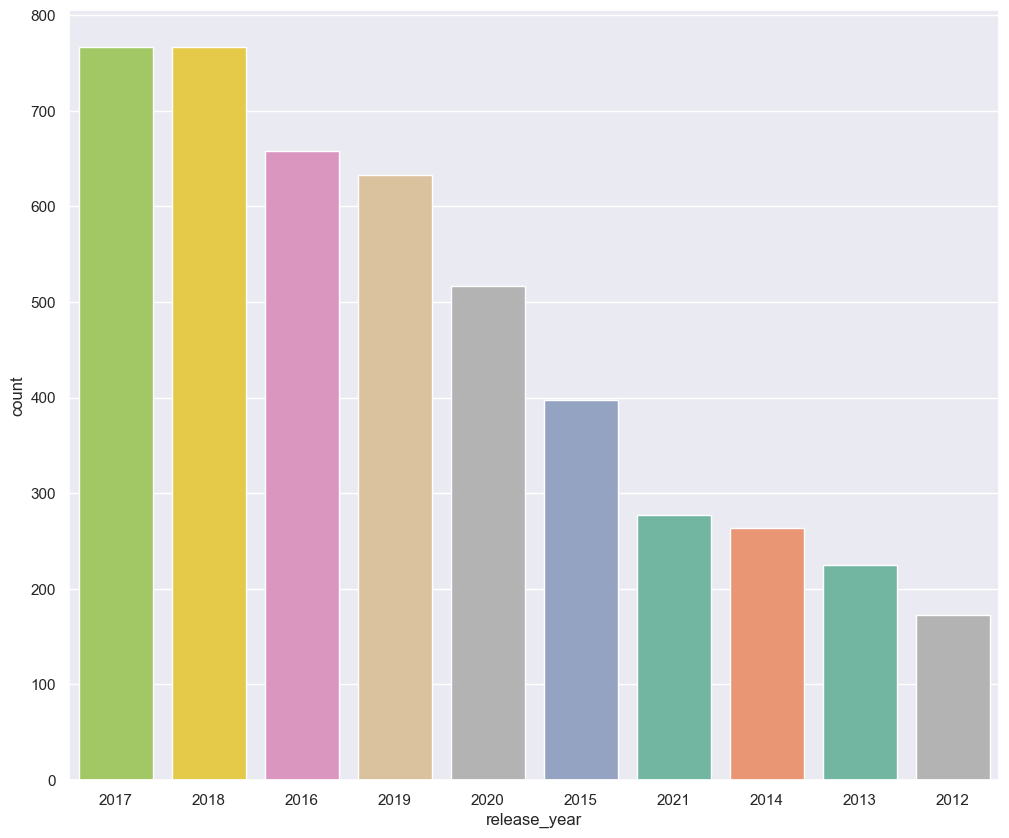

In [20]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
colors = sns.color_palette("Set2", 73)
ax = sns.countplot(x='release_year', hue='release_year', data=df_movies, dodge=False, order=df_movies['release_year'].value_counts().index[0:10], palette=colors)
ax.legend_.remove()

2018 and 2017 are the two most popular years in which the most movies are about 750, in second place 2016 and 2019 are about 650

Find 10 most popular countries among those who release movies

In [21]:
df_movies['country'].value_counts()

country
United States                            2058
India                                     893
Unknown                                   440
United Kingdom                            206
Canada                                    122
                                         ... 
United Kingdom, Russia, United States       1
Paraguay, Argentina                         1
United Kingdom, Malawi                      1
Austria, Iraq, United States                1
United Arab Emirates, Jordan                1
Name: count, Length: 652, dtype: int64

For those rows where there are several countries, we will loop through them and divide them by removing spaces and commas and adding them to the rest of the countries.

In [22]:
countries_mov={}

cou = list(df_movies['country'])
for i in cou:
    i = i.replace(' ','')
    i = list(i.split(','))

    for j in i:
        if j in list(countries_mov.keys()):
            countries_mov[j]+=1
        else:
            countries_mov[j]=1


Sort it

In [23]:
countries_fin=sorted(countries_mov.items(), key=lambda item: countries_mov[item[0]], reverse=True)
countries_fin=countries_fin[:10]
countries_fin

[('UnitedStates', 2752),
 ('India', 962),
 ('UnitedKingdom', 534),
 ('Unknown', 440),
 ('Canada', 319),
 ('France', 303),
 ('Germany', 182),
 ('Spain', 171),
 ('Japan', 119),
 ('China', 114)]

In [24]:
names = [name for name, value in countries_fin]
values= [value for name, value in countries_fin]

Make a visualization of the top 10 countries

[Text(0, 0, 'UnitedStates'),
 Text(1, 0, 'India'),
 Text(2, 0, 'UnitedKingdom'),
 Text(3, 0, 'Unknown'),
 Text(4, 0, 'Canada'),
 Text(5, 0, 'France'),
 Text(6, 0, 'Germany'),
 Text(7, 0, 'Spain'),
 Text(8, 0, 'Japan'),
 Text(9, 0, 'China')]

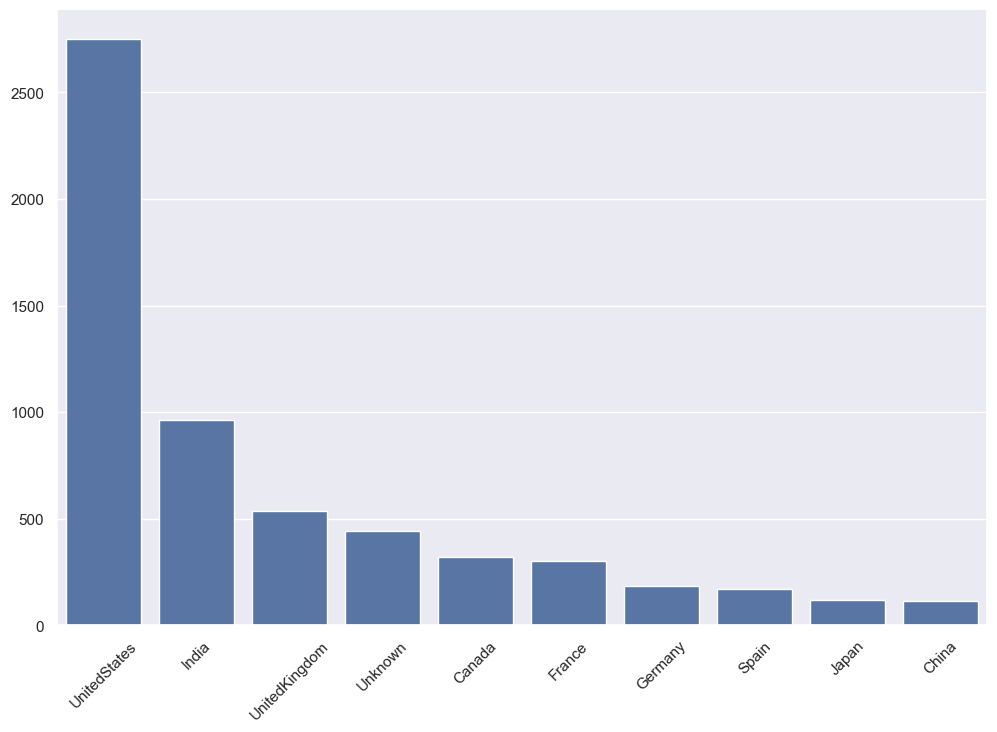

In [25]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=names, y=values)
ax.set_xticks(range(len(names)))
ax.set_xticklabels(names, rotation=45)

Analysis how long movies is coming?

In [26]:
df_movies['duration'] = df_movies['duration'].str.replace(' ', '').str.replace('min', '')

Clear the column of unnecessary text and fill the gaps with 0

In [27]:
df_movies['duration']=df_movies['duration'].fillna(0).astype(int)

<Axes: xlabel='duration', ylabel='Density'>

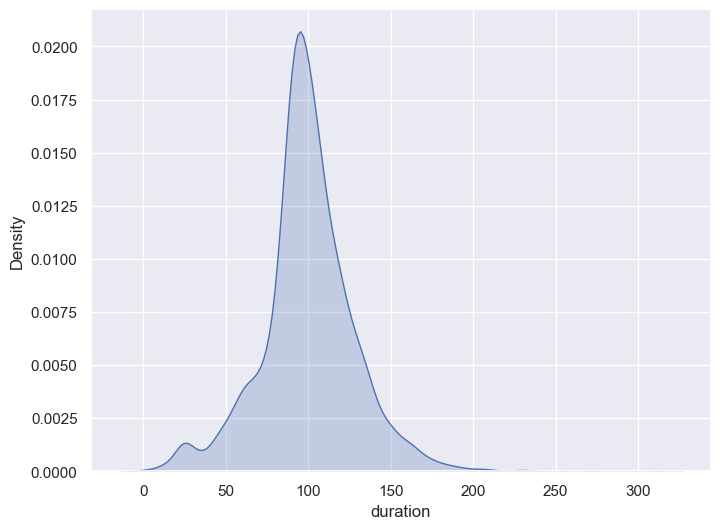

In [28]:
plt.figure(figsize=(8,6))
sns.set(style='darkgrid')
sns.kdeplot(data=df_movies['duration'], fill=True)

The plot shows that the most popular movies last from 75-120 minutes.

Analysis janars

In [29]:
df_movies['listed_in']

0                                          Documentaries
6                               Children & Family Movies
7       Dramas, Independent Movies, International Movies
9                                       Comedies, Dramas
12                          Dramas, International Movies
                              ...                       
8801             Dramas, International Movies, Thrillers
8802                      Cult Movies, Dramas, Thrillers
8804                             Comedies, Horror Movies
8805                  Children & Family Movies, Comedies
8806      Dramas, International Movies, Music & Musicals
Name: listed_in, Length: 6131, dtype: object

In [30]:
from collections import Counter
geners = list(df_movies['listed_in'])
gen = []
for i in geners:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ', ''))
g = Counter(gen)

In the list of genres in films where there is more than one genre, mark them and add them to all genres, count them and grow them

In [31]:
g= sorted(g.items(), key=lambda item: g[item[0]], reverse=True)
g

[('InternationalMovies', 2752),
 ('Dramas', 2427),
 ('Comedies', 1674),
 ('Documentaries', 869),
 ('Action&Adventure', 859),
 ('IndependentMovies', 756),
 ('Children&FamilyMovies', 641),
 ('RomanticMovies', 616),
 ('Thrillers', 577),
 ('Music&Musicals', 375),
 ('HorrorMovies', 357),
 ('Stand-UpComedy', 343),
 ('Sci-Fi&Fantasy', 243),
 ('SportsMovies', 219),
 ('ClassicMovies', 116),
 ('LGBTQMovies', 102),
 ('AnimeFeatures', 71),
 ('CultMovies', 71),
 ('Faith&Spirituality', 65),
 ('Movies', 57)]

In [32]:
genre_names = [name for name, value in g]
genre_values = [value for name, value in g]

Text(0.5, 1.0, 'Genres')

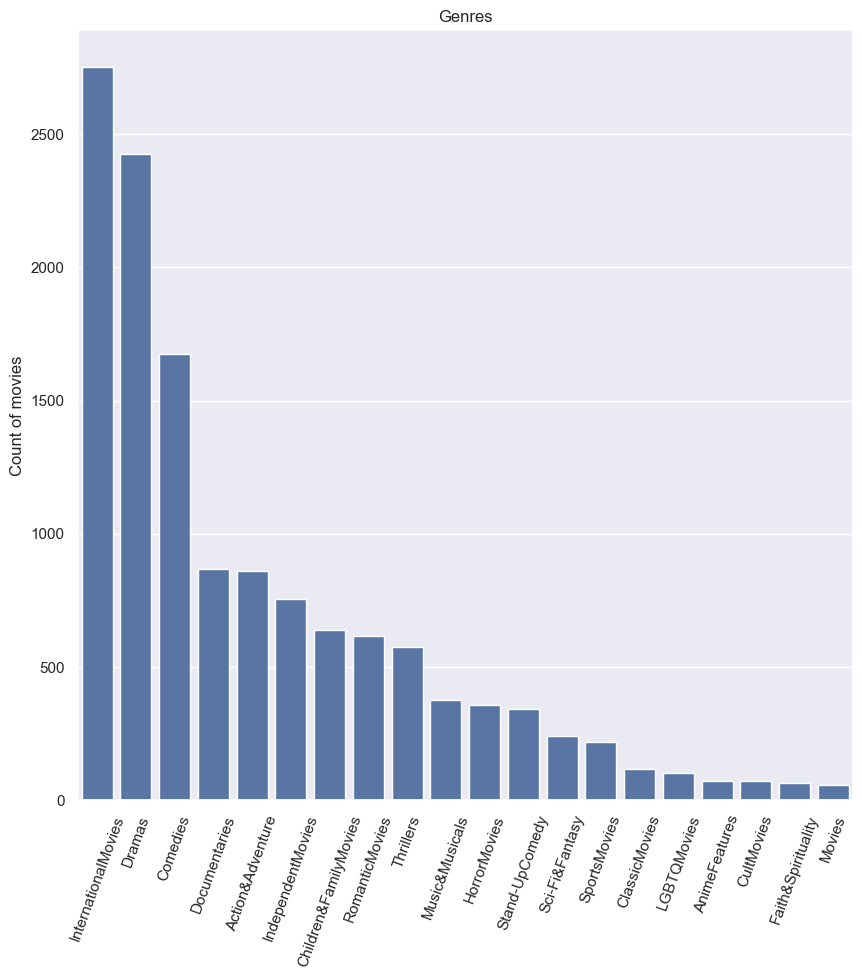

In [33]:
fig = plt.figure(figsize=(10,10))
ax=sns.barplot(x=genre_names, y= genre_values)
ax.set_xticks(range(len(genre_names)))
ax.set_xticklabels(genre_names, rotation=70)
ax.set_ylabel('Count of movies')
ax.set_title('Genres')

The graph shows that the most popular genres among films are international films 2800, dramas 2400 and comedies 1600

## Analysis of show

In [34]:
df_shows.isna().sum()

show_id            0
type               0
title              0
director        2446
cast             350
country            0
date_added        10
release_year       0
rating             2
duration           0
listed_in          0
description        0
dtype: int64

In [35]:
df_shows['country'].value_counts()

country
United States                                    760
Unknown                                          391
United Kingdom                                   213
Japan                                            169
South Korea                                      158
                                                ... 
Belarus                                            1
United Kingdom, Australia                          1
France, Australia, Germany                         1
Australia, New Zealand, United States              1
United States, France, South Korea, Indonesia      1
Name: count, Length: 197, dtype: int64

For those rows where there are several countries, we will loop through them and divide them by removing spaces and commas and adding them to the rest of the countries.

In [36]:
countries_show={}
cou= list(df_shows['country'])
for i in cou:
    i = i.replace(' ','')
    i = list(i.split(','))

    for j in i:
        if j in list(countries_show.keys()):
            countries_show[j]+=1
        else:
            countries_show[j]=1

In [37]:
countries_show

{'SouthAfrica': 11,
 'Unknown': 391,
 'India': 84,
 'UnitedKingdom': 272,
 'UnitedStates': 938,
 'Mexico': 58,
 'Turkey': 30,
 'Australia': 66,
 'Finland': 4,
 'Nigeria': 9,
 'Japan': 199,
 'Belgium': 12,
 'France': 90,
 'SouthKorea': 170,
 'Spain': 61,
 'Singapore': 23,
 'Russia': 16,
 '': 1,
 'Ireland': 14,
 'Italy': 25,
 'Argentina': 20,
 'Jordan': 2,
 'Colombia': 32,
 'Israel': 11,
 'Taiwan': 70,
 'Germany': 44,
 'Canada': 126,
 'Poland': 9,
 'Thailand': 24,
 'NewZealand': 8,
 'Netherlands': 8,
 'Sweden': 11,
 'China': 48,
 'Iceland': 3,
 'Denmark': 14,
 'Philippines': 3,
 'Indonesia': 4,
 'UnitedArabEmirates': 1,
 'Norway': 9,
 'CzechRepublic': 6,
 'Lebanon': 7,
 'Brazil': 31,
 'Uruguay': 1,
 'Egypt': 15,
 'Luxembourg': 2,
 'Senegal': 1,
 'SaudiArabia': 4,
 'Kuwait': 3,
 'Belarus': 1,
 'Chile': 5,
 'Malta': 1,
 'PuertoRico': 1,
 'Austria': 1,
 'Cyprus': 1,
 'Malaysia': 8,
 'Mauritius': 1,
 'HongKong': 5,
 'Croatia': 1,
 'WestGermany': 2,
 'Syria': 1,
 'Hungary': 1,
 'Cuba': 1,
 'G

Sort it

In [38]:
countries_fin2=sorted(countries_show.items(), key=lambda item: countries_show[item[0]], reverse=True)
countries_fin2 = countries_fin2[:10]

In [39]:
countries_fin2

[('UnitedStates', 938),
 ('Unknown', 391),
 ('UnitedKingdom', 272),
 ('Japan', 199),
 ('SouthKorea', 170),
 ('Canada', 126),
 ('France', 90),
 ('India', 84),
 ('Taiwan', 70),
 ('Australia', 66)]

In [40]:
names = [name for name, value in countries_fin2]
value = [value for name, value in countries_fin2]

Top 10 countries

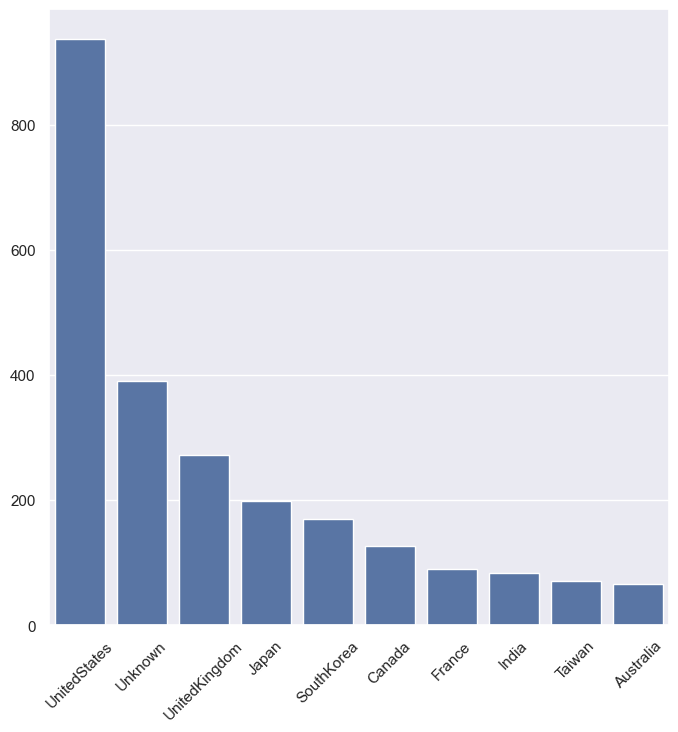

In [68]:
plt.figure(figsize=(8, 8))
ax = sns.barplot(x=names, y=value)
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(names, rotation=45)
plt.show()


Show with a lots of seosens

In [42]:
features = ['title', 'duration']
durations=df_shows[features]
durations

,title,duration
1,Blood & Water,2 Seasons
2,Ganglands,1 Season
3,Jailbirds New Orleans,1 Season
4,Kota Factory,2 Seasons
5,Midnight Mass,1 Season
...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons
8796,Yunus Emre,2 Seasons
8797,Zak Storm,3 Seasons
8800,Zindagi Gulzar Hai,1 Season


In [70]:
durations.loc[:, 'no_of_seasons'] = durations['duration'].str.replace(' Seasons?', '', regex=True).astype(int)
durations

,title,duration,no_of_seasons
1,Blood & Water,2 Seasons,2
2,Ganglands,1 Season,1
3,Jailbirds New Orleans,1 Season,1
4,Kota Factory,2 Seasons,2
5,Midnight Mass,1 Season,1
...,...,...,...
8795,Yu-Gi-Oh! Arc-V,2 Seasons,2
8796,Yunus Emre,2 Seasons,2
8797,Zak Storm,3 Seasons,3
8800,Zindagi Gulzar Hai,1 Season,1


Сlear the duration column of unnecessary characters. Take the top 10 TV shows by the number of seasons

In [44]:
t= ['title','no_of_seasons']
top=durations[t]
top= top.sort_values(by='no_of_seasons', ascending=False)
top10=top[:10]
top

,title,no_of_seasons
548,Grey's Anatomy,17
2423,Supernatural,15
4798,NCIS,15
1354,Heartland,13
4220,COMEDIANS of the world,13
...,...,...
3853,I Have a Script,1
3852,Abyss,1
3851,Unchained Fate,1
3850,The Missing Menu,1


([<matplotlib.axis.XTick at 0x1698f3e80>,
 [Text(0.0, 0, "Grey's Anatomy"),
  Text(1.0, 0, 'Supernatural'),
  Text(2.0, 0, 'NCIS'),
  Text(3.0, 0, 'Heartland'),
  Text(4.0, 0, 'COMEDIANS of the world'),
  Text(5.0, 0, 'Red vs. Blue'),
  Text(6.0, 0, 'Trailer Park Boys'),
  Text(7.0, 0, 'Criminal Minds'),
  Text(8.0, 0, 'Frasier'),
  Text(9.0, 0, 'Cheers')])

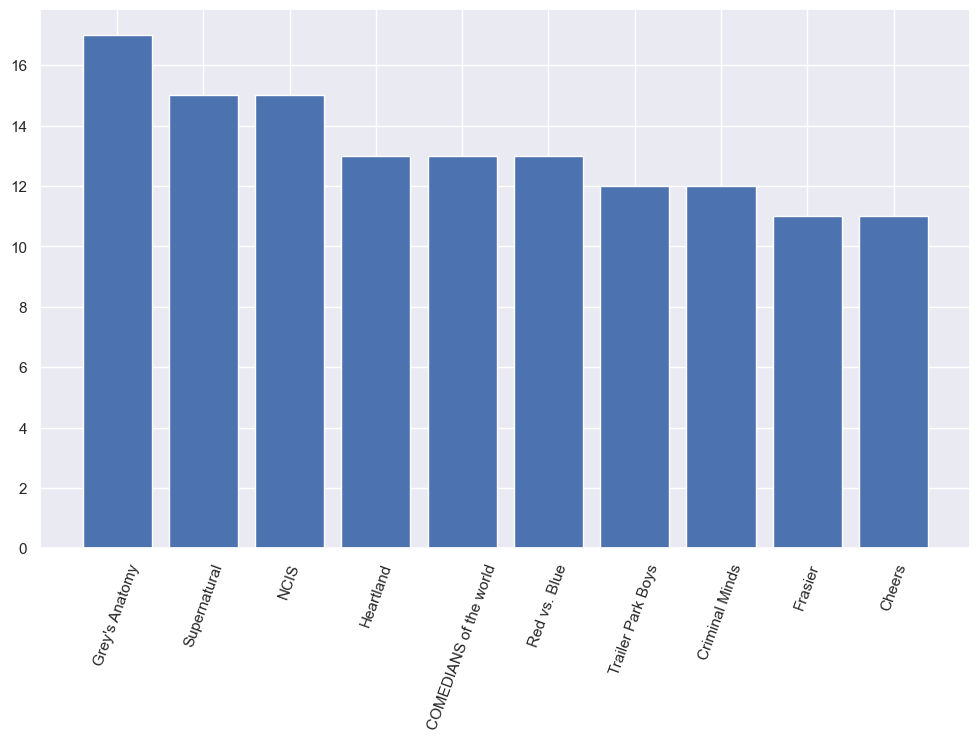

In [45]:
plt.figure(figsize=(12,7))
plt.bar(top10['title'], top10['no_of_seasons'])
plt.xticks(top10['title'], rotation=70)

Analysis geners

In [46]:
df_shows['listed_in']

1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
5                      TV Dramas, TV Horror, TV Mysteries
                              ...                        
8795                               Anime Series, Kids' TV
8796                    International TV Shows, TV Dramas
8797                                             Kids' TV
8800    International TV Shows, Romantic TV Shows, TV ...
8803               Kids' TV, Korean TV Shows, TV Comedies
Name: listed_in, Length: 2676, dtype: object

In [47]:
from collections import Counter
geners = list(df_shows['listed_in'])
gen = []
for i in geners:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ', ''))
g = Counter(gen)

In the list of genres in films where there is more than one genre, mark them and add them to all genres, count them and grow them

In [48]:
g= sorted(g.items(), key=lambda item: g[item[0]], reverse=True)
genre_names = [name for name, value in g]
genre_values = [value for name, value in g]

Text(0.5, 1.0, 'Genres')

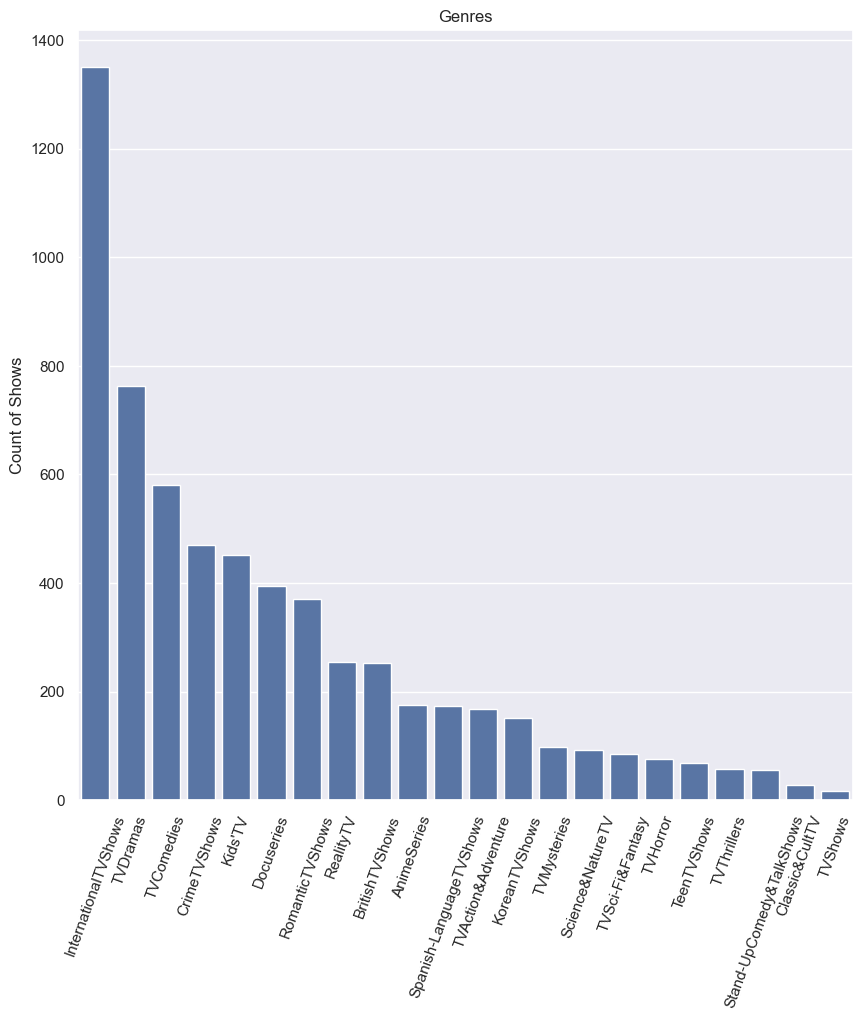

In [49]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=genre_names, y=genre_values, ax=ax)

ax.set_xticks(range(len(genre_names)))
ax.set_xticklabels(genre_names, rotation=70)
ax.set_ylabel('Count of Shows')
ax.set_title('Genres')

Analysis of time seasons

In [50]:
durations[t]

,title,no_of_seasons
1,Blood & Water,2
2,Ganglands,1
3,Jailbirds New Orleans,1
4,Kota Factory,2
5,Midnight Mass,1
...,...,...
8795,Yu-Gi-Oh! Arc-V,2
8796,Yunus Emre,2
8797,Zak Storm,3
8800,Zindagi Gulzar Hai,1


Let's make a graph that will show the popularity of the number of seasons, and as you can see, one season is the most popular TV show

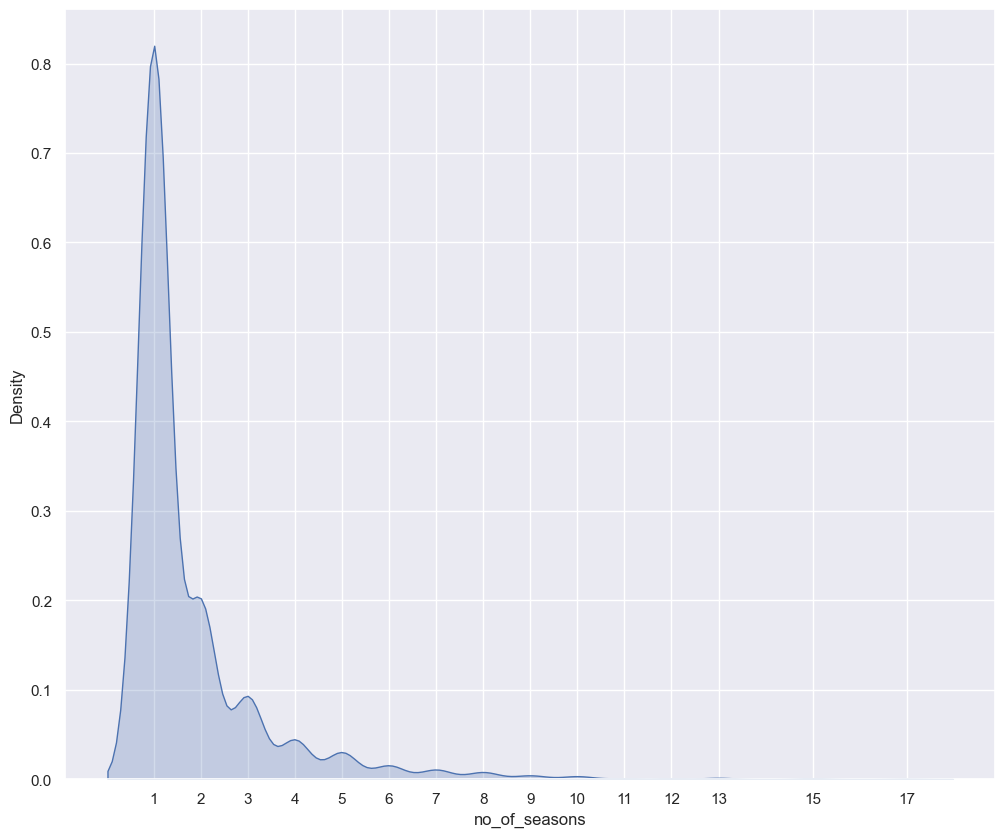

In [51]:
plt.figure(figsize=(12, 10))
sns.set(style='darkgrid')
sns.kdeplot(data=durations['no_of_seasons'], fill=True)

plt.xticks(sorted(durations['no_of_seasons'].unique()))
plt.show()

## Recomendation for movies 

To build our movies recommendation system, we will use the Bag-of-words model, which is a way of representing textual data when modeling text using machine learning algorithms. Machine learning algorithms cannot work with raw text directly; the text must be converted into well-defined fixed-length numbers (a vector).

In [52]:
df_movies['description']

0       As her father nears the end of his life, filmm...
6       Equestria's divided. But a bright-eyed hero be...
7       On a photo shoot in Ghana, an American model s...
9       A woman adjusting to life after a loss contend...
12      After most of her family is murdered in a terr...
                              ...                        
8801    Recovering alcoholic Talal wakes up inside a s...
8802    A political cartoonist, a crime reporter and a...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 6131, dtype: object

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
df_movies['description']=df_movies['description'].fillna('')
df_movies['description'].head()

0     As her father nears the end of his life, filmm...
6     Equestria's divided. But a bright-eyed hero be...
7     On a photo shoot in Ghana, an American model s...
9     A woman adjusting to life after a loss contend...
12    After most of her family is murdered in a terr...
Name: description, dtype: object

In [55]:
tf1df=TfidfVectorizer(stop_words='english')
tf1df_matrix= tf1df.fit_transform(df_movies['description'])
tf1df_matrix.shape

(6131, 15483)

Based on the description, using the sklearn library, we will decompose all the descriptions of movies and create a matrix that will contain 15,000 words describing 6,000 movies

In [56]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim=cosine_similarity(tf1df_matrix,tf1df_matrix)
cosine_sim.shape

(6131, 6131)

Based on the data obtained, we will make a cosine similarity (measures the similarity between two vectors of an inner product space) of our matrix to obtain a matrix with data on which movies is similar to which other movies

In [57]:
indices= pd.Series(df_movies.index, index=df_movies['title']).drop_duplicates()

In [58]:
cosine_sim_df=pd.DataFrame(cosine_sim)
cosine_sim_df.columns=indices.index
cosine_sim_df['title']= indices.index
cosine_sim_df=cosine_sim_df.set_index('title')
cosine_sim_df.head()

title,Dick Johnson Is Dead,My Little Pony: A New Generation,Sankofa,The Starling,Je Suis Karl,Confessions of an Invisible Girl,Europe's Most Dangerous Man: Otto Skorzeny in Spain,Intrusion,Avvai Shanmughi,Go! Go! Cory Carson: Chrissy Takes the Wheel,...,Young Tiger,"Yours, Mine and Ours",اشتباك,Zed Plus,Zenda,Zinzana,Zodiac,Zombieland,Zoom,Zubaan
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,1.000000,0.0,0.0,0.018285,0.000000,0.0,0.014848,0.0,0.023927,0.0,...,0.0,0.02889,0.0,0.0,0.0,0.0,0.0,0.000000,0.016245,0.000000
My Little Pony: A New Generation,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
Sankofa,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.029736,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.036504
The Starling,0.018285,0.0,0.0,1.000000,0.029133,0.0,0.016294,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.061674,0.017826,0.045998
Je Suis Karl,0.000000,0.0,0.0,0.029133,1.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.028473


Let's write a get_recomend function that will receive as input the name of the movies that the viewer has watched and give out the top 10 movies similar to it

In [59]:
def get_recomend(title,cosine_sim=cosine_sim_df):
    idx= indices[title]
    sim_scores=list(enumerate(cosine_sim_df.loc[title]))

    sim_scores= sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores=sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df_movies['title']. iloc[movie_indices]

Make recommendations for the movie 'Last Breath'

In [60]:
df_movies[df_movies['title']== "Last Breath"].description.iloc[0]

'A commercial diver becomes trapped on the ocean floor with dwindling oxygen and little hope of a timely rescue, so he tries to save himself.'

In [61]:
get_recomend('Last Breath')

7061                                          In The Deep
940                        Motu Patlu: Deep Sea Adventure
2703                                               Mine 9
6466                                       Chicken Little
7616                               NOVA: Thai Cave Rescue
636                                          The Ice Road
5773    My Little Pony Equestria Girls: Legend of Ever...
4616                                          Big Miracle
895                                                Oxygen
3070                                              Posesif
Name: title, dtype: object

We see the top 10 similar movies, check if the description of the first movie is similar 

In [62]:
df_movies[df_movies['title']== "In The Deep"].description.iloc[0]

'With little oxygen left in their scuba tanks, two sisters are trapped in a shark cage at the bottom of the ocean while great whites circle nearby.'

You also see that In The Deep has the highest cosine_similarity to the movie Last Breath

In [63]:
cosine_sim_df['Last Breath'].sort_values(ascending=False)

title
Last Breath                       1.000000
In The Deep                       0.263331
Motu Patlu: Deep Sea Adventure    0.193887
Mine 9                            0.152162
Chicken Little                    0.141503
                                    ...   
The Lovers                        0.000000
Seth Meyers: Lobby Baby           0.000000
Luccas Neto in: Summer Camp       0.000000
Shadow                            0.000000
Zubaan                            0.000000
Name: Last Breath, Length: 6131, dtype: float64

## Thank you